In [31]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

In [32]:
synth_pop_df = pd.read_csv('Data/Aberdeen_SP_Sample.csv')

In [33]:
synth_pop_df.shape

(193271, 15)

In [34]:
bounds_df = gp.read_file('Data/AberdeenBounds.geojson')

In [35]:
bounds_df.shape

(111, 10)

## Load from csv

In [36]:
synth_pop_df.head()

,ZoneID,hidp,pidp,ctr_code,sex,age_dv,sf12mcs_dv,sf12pcs_dv,smoker,ncigs,xphsdct,fihhmngrs_dv,msoa11cd,ladcd,ladnm
0,S01006506,68129220,68037407,S,2,50,57.33,53.46,1,10,2,1909.369995,S02001236,S12000033,Aberdeen City
1,S01006506,68455620,68538656,S,1,32,52.08,55.93,1,0,2,4083.929932,S02001236,S12000033,Aberdeen City
2,S01006506,68537220,68155063,S,1,26,54.10,59.11,2,-8,2,6895.799805,S02001236,S12000033,Aberdeen City
3,S01006506,68707220,68193131,S,1,31,38.98,54.79,2,-8,2,807.159973,S02001236,S12000033,Aberdeen City
4,S01006506,68802420,68214207,S,1,60,52.65,51.64,1,10,2,2645.000000,S02001236,S12000033,Aberdeen City


## Get list of unique values ie all the ZoneIDs

In [37]:
all_zones = list(synth_pop_df.ZoneID.unique())
zones = list(bounds_df.DataZone.unique())

## Intersection beween the two data sets

In [38]:
union_list = list(set(all_zones).intersection(set(zones)))

## Get a sub set of the full data set

In [39]:
aberdeen_synth_pop_df = synth_pop_df[synth_pop_df.ZoneID.isin(union_list)]

In [40]:
aberdeen_synth_pop_df.shape

(80078, 15)

## Min value of column

In [41]:
aberdeen_synth_pop_df.loc[aberdeen_synth_pop_df.age_dv.idxmin()].age_dv

16

## Select sub data on col value and selection of fields

In [42]:
admin_dist_df = aberdeen_synth_pop_df.loc[aberdeen_synth_pop_df.ZoneID == zones[4],["sex","age_dv","fihhmngrs_dv"]]

## Count rows

In [43]:
admin_dist_df.shape[0]

574

## Discriptive stats

In [44]:
admin_dist_df[["age_dv","fihhmngrs_dv"]].describe().to_dict

<bound method DataFrame.to_dict of            age_dv  fihhmngrs_dv
count  574.000000    574.000000
mean    49.928571   4926.943147
std     17.896740   3337.842760
min     16.000000      0.000000
25%     37.000000   2461.785095
50%     50.000000   4410.004883
75%     61.000000   6554.147583
max     93.000000  27975.269531>

## Get list of counts of values

In [45]:
list(admin_dist_df.groupby("sex").sex.count())

[275, 299]

## Plot hist of a column

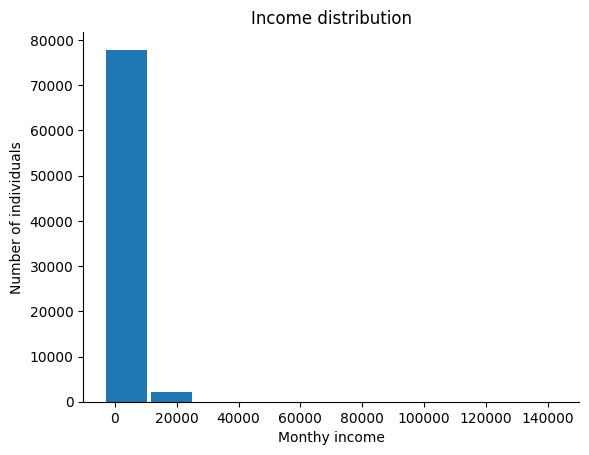

In [46]:
ax = aberdeen_synth_pop_df.fihhmngrs_dv.plot.hist(bins=10,rwidth=0.9  )
ax.set_title("Income distribution")
ax.set_xlabel("Monthy income")
ax.set_ylabel("Number of individuals")
ax.spines[['right', 'top']].set_visible(False)

Text(0, 0.5, 'Number of individuals')

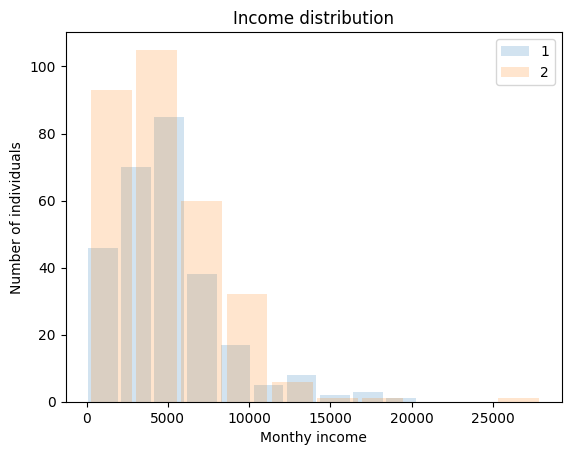

In [49]:
fig, axs = plt.subplots(1,1)
ax = admin_dist_df.groupby('sex').fihhmngrs_dv.plot.hist(ax=axs,bins=10,rwidth=0.9, alpha=0.2, 
                                                          title="Income distribution by sex",
                                                          xlabel=" £ Monthy income"
                                                         ,ylabel="Number of individuals"
                                                         ,legend=["M","F"])

plt.title("Income distribution")
plt.xlabel("Monthy income")
plt.ylabel("Number of individuals")


In [77]:
grouped_data =list(admin_dist_df.groupby('sex').fihhmngrs_dv)

In [86]:
grouped_data[0][1].mean()

3857.3108407910277

In [88]:
grouped_data[1][1].mean()

3524.690600681973